In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
77,15774179,Female,22,27000,0
177,15594577,Male,25,22000,0
145,15746422,Female,24,89000,0
20,15649487,Male,45,22000,1
156,15791174,Male,46,59000,0


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df['Gender'] = df['Gender'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   User ID          400 non-null    int64   
 1   Gender           400 non-null    category
 2   Age              400 non-null    int64   
 3   EstimatedSalary  400 non-null    int64   
 4   Purchased        400 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 13.1 KB


# Scaling the values of Age and Salary

In [7]:
# for age

std = 10.482877
mean = 37.655000
scaled_vals = []

for i in df['Age']:
    orig = i
    val = (orig - mean) / (std)
    scaled_vals.append(val)

Age_new = np.array(scaled_vals, dtype=float)
    

In [8]:
Age_new.ndim

1

In [9]:
# for salary

std = 34096.960282	
mean = 69742.500000
scaled_vals = []

for i in df['EstimatedSalary']:
    orig = i
    val = (orig - mean) / (std)
    scaled_vals.append(val)

Salary_new = np.array(scaled_vals, dtype=float)

In [10]:
Salary_new.ndim

1

# converting these new values back to df and changing the data

In [11]:
Sal_new = pd.DataFrame(Salary_new, dtype=float)

In [12]:
Sal_new

,0
0,-1.488183
1,-1.458854
2,-0.784307
3,-0.373714
4,0.183521
...,...
395,-0.842964
396,-1.370870
397,-1.458854
398,-1.077589


In [13]:
A_new = pd.DataFrame(Age_new, dtype=float)

In [14]:
A_new

,0
0,-1.779569
1,-0.253270
2,-1.111813
3,-1.016419
4,-1.779569
...,...
395,0.796060
396,1.273028
397,1.177635
398,-0.157877


In [15]:
df_new = pd.read_csv('Social_Network_Ads.csv')

In [16]:
df_new['Age'] = A_new
df_new['EstimatedSalary'] = Sal_new

In [17]:
df_new

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,-1.779569,-1.488183,0
1,15810944,Male,-0.253270,-1.458854,0
2,15668575,Female,-1.111813,-0.784307,0
3,15603246,Female,-1.016419,-0.373714,0
4,15804002,Male,-1.779569,0.183521,0
...,...,...,...,...,...
395,15691863,Female,0.796060,-0.842964,1
396,15706071,Male,1.273028,-1.370870,1
397,15654296,Female,1.177635,-1.458854,1
398,15755018,Male,-0.157877,-1.077589,0


In [18]:
df_new.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,0.000000,0.000000,0.357500
std,7.165832e+04,1.000000,1.000000,0.479864
min,1.556669e+07,-1.874962,-1.605495,0.000000
25%,1.562676e+07,-0.754087,-0.784307,0.000000
50%,1.569434e+07,-0.062483,0.007552,0.000000
75%,1.575036e+07,0.796060,0.535458,1.000000
max,1.581524e+07,2.131571,2.353802,1.000000


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

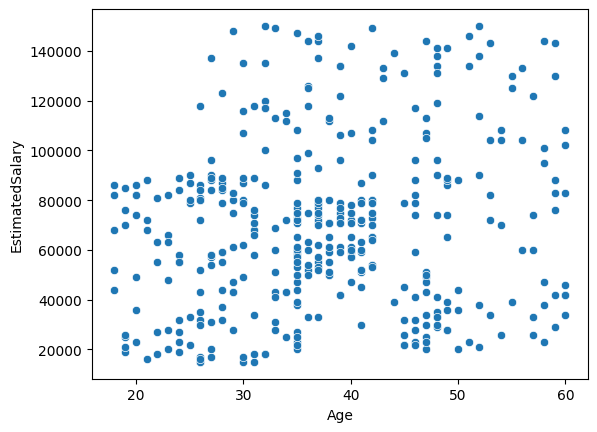

In [19]:
sns.scatterplot(x=df['Age'], y=df['EstimatedSalary'])

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

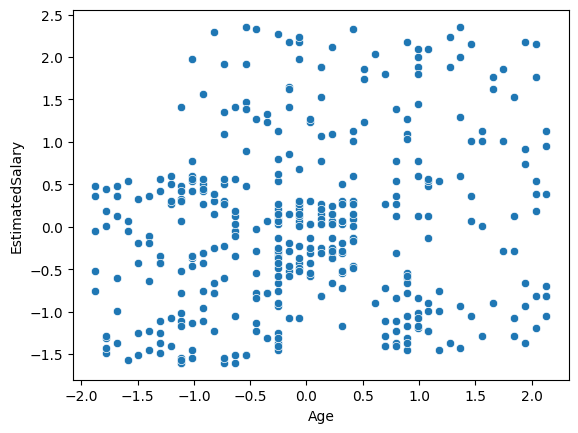

In [20]:
sns.scatterplot(x=df_new['Age'], y=df_new['EstimatedSalary'])

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

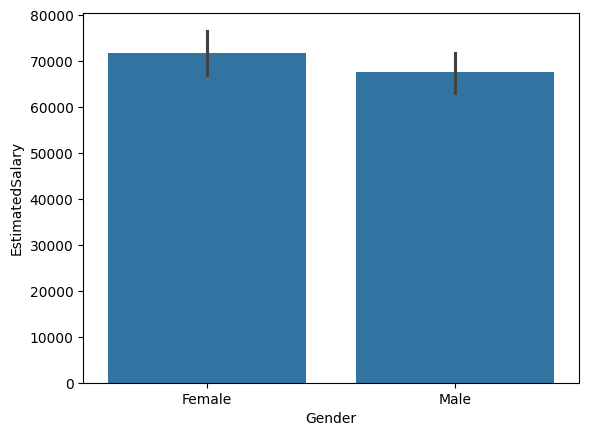

In [21]:
sns.barplot(x=df['Gender'], y=df['EstimatedSalary'])

<Axes: ylabel='Frequency'>

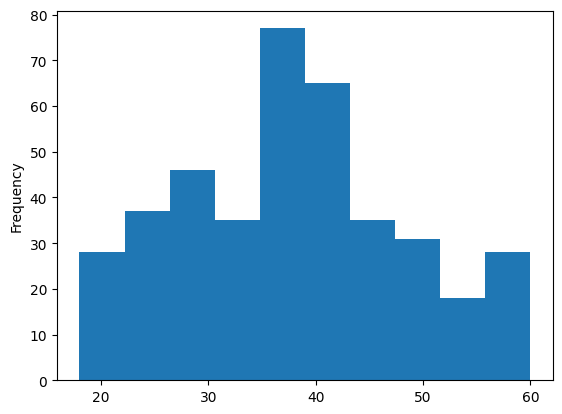

In [22]:
df['Age'].plot(kind='hist')

<Axes: xlabel='Gender', ylabel='Age'>

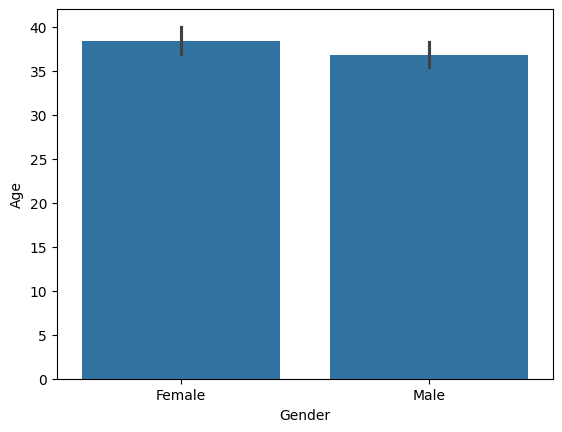

In [23]:
sns.barplot(x=df['Gender'], y=df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

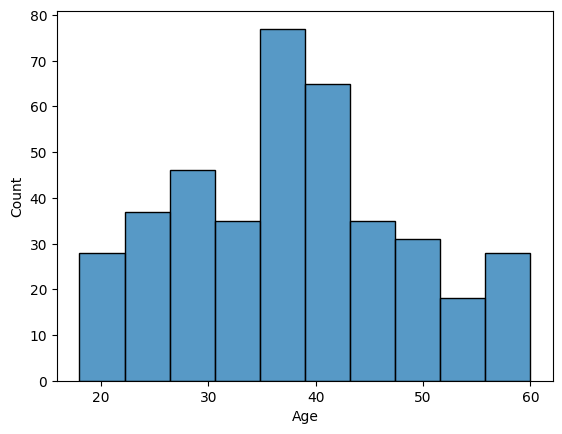

In [24]:
sns.histplot(df['Age'])